# Notebook to plot cytokine producer composition (related to figure 4)

In [1]:
import numpy as np
import pandas
import networkx as nx
import matplotlib.pyplot as plt
import os
import seaborn as sns
from statannot import add_stat_annotation
import glob
from tqdm.notebook import tqdm
from copy import copy
import matplotlib.gridspec as gridspec

# Load data

In [2]:
Composition_cytokine_prod = pandas.read_csv('Data/Cytokine_producing_cells_composition.csv')

### CXCL12 expression of Lhx2+ cells

In [3]:
total_lhx2 = Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['Lhx2+', 'Lhx2+, CXCL12-bright+', 'Lhx2+, CXCL12-dim+'])].groupby(['date']).sum().reset_index()
Compo_lhx2 = copy(Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['Lhx2+', 'Lhx2+, CXCL12-bright+', 'Lhx2+, CXCL12-dim+'])])
for date in Compo_lhx2.date.unique():
    Compo_lhx2.loc[Compo_lhx2.date == date, 'total_lhx2'] = total_lhx2.loc[total_lhx2.date == date, 'composition'].item()
Compo_lhx2['relative_lhx2'] = 100* Compo_lhx2['composition'] / Compo_lhx2['total_lhx2']
Compo_lhx2.loc[Compo_lhx2.short_name == 'Lhx2+, CXCL12-bright+', 'lhx2_types'] = 'CXCL12-bright+'
Compo_lhx2.loc[Compo_lhx2.short_name == 'Lhx2+, CXCL12-dim+', 'lhx2_types'] = 'CXCL12-dim+'
Compo_lhx2.loc[Compo_lhx2.short_name == 'Lhx2+', 'lhx2_types'] = 'Lhx2+'

C:\Users\vabonnet\AppData\Local\Temp\ipykernel_21256\3786933901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_lhx2 = Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['Lhx2+', 'Lhx2+, CXCL12-bright+', 'Lhx2+, CXCL12-dim+'])].groupby(['date']).sum().reset_index()


### CXCL12 expression of HNF4a+ cells

In [4]:
total_hnf4a = Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['HNF4a+', 'HNF4a+, CXCL12-bright+', 'HNF4a+, CXCL12-dim+'])].groupby(['date']).sum().reset_index()
Compo_hnf4a = copy(Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['HNF4a+', 'HNF4a+, CXCL12-bright+', 'HNF4a+, CXCL12-dim+'])])
for date in Compo_hnf4a.date.unique():
    Compo_hnf4a.loc[Compo_hnf4a.date == date, 'total_hnf4a'] = total_hnf4a.loc[total_hnf4a.date == date, 'composition'].item()
Compo_hnf4a['relative_hnf4a'] = 100* Compo_hnf4a['composition'] / Compo_hnf4a['total_hnf4a']
Compo_hnf4a.loc[Compo_hnf4a.short_name == 'HNF4a+, CXCL12-bright+', 'hnf4a_types'] = 'CXCL12-bright+'
Compo_hnf4a.loc[Compo_hnf4a.short_name == 'HNF4a+, CXCL12-dim+', 'hnf4a_types'] = 'CXCL12-dim+'
Compo_hnf4a.loc[Compo_hnf4a.short_name == 'HNF4a+', 'hnf4a_types'] = 'HNF4a+'

C:\Users\vabonnet\AppData\Local\Temp\ipykernel_21256\3639684168.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_hnf4a = Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['HNF4a+', 'HNF4a+, CXCL12-bright+', 'HNF4a+, CXCL12-dim+'])].groupby(['date']).sum().reset_index()


### CXCL12-bright+ cells

In [5]:
Composition_lhx2_total = Composition_cytokine_prod.loc[Composition_cytokine_prod.Lhx2 == 1]
total_cxcl12bright = Composition_lhx2_total.loc[Composition_lhx2_total.short_name.isin(['Lhx2+, CXCL12-bright+', 'CXCL12-bright+'])].groupby(['date']).sum().reset_index()
Compo_bright = copy(Composition_lhx2_total.loc[Composition_lhx2_total.short_name.isin(['Lhx2+, CXCL12-bright+', 'CXCL12-bright+'])])
for date in Compo_bright.date.unique():
    Compo_bright.loc[Compo_bright.date == date, 'total_cxcl12bright'] = total_cxcl12bright.loc[total_cxcl12bright.date == date, 'composition'].item()
Compo_bright['relative_cxcl12bright'] = 100* Compo_bright['composition'] / Compo_bright['total_cxcl12bright']
Compo_bright.loc[Compo_bright.short_name == 'Lhx2+, CXCL12-bright+', 'cxcl12bright_types'] = 'Lhx2+'
Compo_bright.loc[Compo_bright.short_name == 'CXCL12-bright+', 'cxcl12bright_types'] = 'CXCL12-bright+'

C:\Users\vabonnet\AppData\Local\Temp\ipykernel_21256\3988348615.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cxcl12bright = Composition_lhx2_total.loc[Composition_lhx2_total.short_name.isin(['Lhx2+, CXCL12-bright+', 'CXCL12-bright+'])].groupby(['date']).sum().reset_index()


### CXCL12-dim+ cells

In [6]:
total_cxcl12dim = Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['Lhx2+, CXCL12-dim+', 'HNF4a+, CXCL12-dim+', 'CXCL12-dim+'])].groupby(['date']).sum().reset_index()
Compo_dim = copy(Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['Lhx2+, CXCL12-dim+', 'HNF4a+, CXCL12-dim+', 'CXCL12-dim+'])])
for date in Compo_dim.date.unique():
    Compo_dim.loc[Compo_dim.date == date, 'total_cxcl12dim'] = total_cxcl12dim.loc[total_cxcl12dim.date == date, 'composition'].item()
Compo_dim['relative_cxcl12dim'] = 100* Compo_dim['composition'] / Compo_dim['total_cxcl12dim']
Compo_dim.loc[Compo_dim.short_name == 'Lhx2+, CXCL12-dim+', 'cxcl12dim_types'] = 'Lhx2+'
Compo_dim.loc[Compo_dim.short_name == 'HNF4a+, CXCL12-dim+', 'cxcl12dim_types'] = 'HNF4a+'
Compo_dim.loc[Compo_dim.short_name == 'CXCL12-dim+', 'cxcl12dim_types'] = 'CXCL12-dim+'

C:\Users\vabonnet\AppData\Local\Temp\ipykernel_21256\1622101901.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_cxcl12dim = Composition_cytokine_prod.loc[Composition_cytokine_prod.short_name.isin(['Lhx2+, CXCL12-dim+', 'HNF4a+, CXCL12-dim+', 'CXCL12-dim+'])].groupby(['date']).sum().reset_index()


# Plot

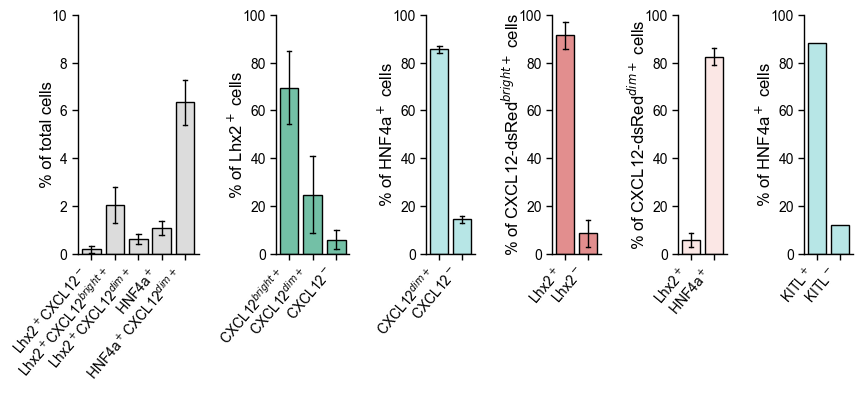

In [9]:
# Define font
plt.rc('font',family='Arial')

# Plot
fig = plt.figure(figsize=(10, 3.1))
gs = fig.add_gridspec(nrows=1, ncols=6, width_ratios=[5, 3, 2, 2, 2, 2], wspace=1.2)

ax1 = fig.add_subplot(gs[0, 0])
order_ax1 = ['Lhx2+', 
         'Lhx2+, CXCL12-bright+',
         'Lhx2+, CXCL12-dim+',
         'HNF4a+',
         'HNF4a+, CXCL12-dim+',]

ax1 = sns.barplot(x="short_name", 
                 y="composition",
                 data=Composition_cytokine_prod,
                 order = order_ax1,
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'gainsboro',
                 lw = 1, 
                 edgecolor="0")

ax2 = fig.add_subplot(gs[0, 1])
order_ax2 = ['CXCL12-bright+', 'CXCL12-dim+', 'Lhx2+']
ax2 = sns.barplot(x="lhx2_types", 
                 y="relative_lhx2",
                 data=Compo_lhx2,
                 order = order_ax2,
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'mediumaquamarine',
                 lw = 1, 
                 edgecolor="0")

ax3 = fig.add_subplot(gs[0, 2])
order_ax3 = ['CXCL12-dim+', 'HNF4a+']
ax3 = sns.barplot(x="hnf4a_types", 
                 y="relative_hnf4a",
                 data=Compo_hnf4a,
                 order = order_ax3,
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'paleturquoise',
                 lw = 1, 
                 edgecolor="0")

ax4 = fig.add_subplot(gs[0, 3])
order_ax4 = ['Lhx2+', 'CXCL12-bright+']
ax4 = sns.barplot(x="cxcl12bright_types", 
                 y="relative_cxcl12bright",
                 data=Compo_bright,
                 order = order_ax4,
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'lightcoral',
                 lw = 1, 
                 edgecolor="0")

ax5 = fig.add_subplot(gs[0, 4])
order_ax5 = ['Lhx2+', 'HNF4a+']
ax5 = sns.barplot(x="cxcl12dim_types", 
                 y="relative_cxcl12dim",
                 data=Compo_dim,
                 order = order_ax5,
                 errorbar='sd',
                 errcolor='black',
                 capsize=0.2,
                 errwidth=1,
                 color = 'mistyrose',
                 lw = 1, 
                 edgecolor="0")

ax6 = fig.add_subplot(gs[0, 5])
order_ax6 = ['KitL+', 'KitL-']
ax6 = sns.barplot(x='short_name',
                 y = 'composition',
                 data = Composition_cytokine_prod,
                 order = order_ax6,
                 errcolor='black',
                 capsize=0.1,
                 errwidth=1,
                 color = 'paleturquoise',
                 lw = 1, 
                 edgecolor="0")

ax1.set_ylim(0,10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)        
ax1.tick_params(width=1, length=4)
ax1.set_xlabel(' ', fontsize = 10)
ax1.margins(0.04, 0)  

ax2.set_ylim(0,100)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
ax2.tick_params(axis='x', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)        
ax2.tick_params(width=1, length=4)
ax2.set_xlabel(' ', fontsize = 10)
ax2.margins(0.05, 0)  

ax3.set_ylim(0,100)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(True)
ax3.spines['left'].set_visible(True)
ax3.tick_params(axis='x', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)        
ax3.tick_params(width=1, length=4)
ax3.set_xlabel(' ', fontsize = 10)
ax3.margins(0.1, 0)  

ax4.set_ylim(0,100)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(True)
ax4.spines['left'].set_visible(True)
ax4.tick_params(axis='x', labelsize=10)
ax4.tick_params(axis='y', labelsize=10)        
ax4.tick_params(width=1, length=4)
ax4.set_xlabel(' ', fontsize = 10)
ax4.margins(0.1, 0)  

ax5.set_ylim(0,100)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['bottom'].set_visible(True)
ax5.spines['left'].set_visible(True)
ax5.tick_params(axis='x', labelsize=10)
ax5.tick_params(axis='y', labelsize=10)        
ax5.tick_params(width=1, length=4)
ax5.set_xlabel(' ', fontsize = 10)
ax5.margins(0.08, 0)  

ax6.set_ylim(0,100)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['bottom'].set_visible(True)
ax6.spines['left'].set_visible(True)
ax6.tick_params(axis='x', labelsize=10)
ax6.tick_params(axis='y', labelsize=10)        
ax6.tick_params(width=1, length=4)
ax6.set_xlabel(' ', fontsize = 10)
ax6.margins(0.1, 0)  
    
for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1)
        ax2.spines[axis].set_linewidth(1)
        ax3.spines[axis].set_linewidth(1)
        ax4.spines[axis].set_linewidth(1)
        ax5.spines[axis].set_linewidth(1)
        ax6.spines[axis].set_linewidth(1)

ax1.set_ylabel('% of total cells', fontsize = 12, labelpad = -2)
ax2.set_ylabel('% of Lhx2$^+$ cells', fontsize = 12, labelpad = -2)
ax3.set_ylabel('% of HNF4a$^+$ cells', fontsize = 12, labelpad = -2)
ax4.set_ylabel('% of CXCL12-dsRed$^{bright+}$ cells', fontsize = 12, labelpad = -2)
ax5.set_ylabel('% of CXCL12-dsRed$^{dim+}$ cells', fontsize = 12, labelpad = -2)
ax6.set_ylabel('% of HNF4a$^+$ cells', fontsize = 12, labelpad = -2)

# Add labels of x axis with subscripts
ticklabels = ['Lhx2$^+$CXCL12$^-$', 'Lhx2$^+$CXCL12$^{bright+}$', 'Lhx2$^+$CXCL12$^{dim+}$', 'HNF4a$^+$', 'HNF4a$^+$CXCL12$^{dim+}$']
ticklabels_bright = ['Lhx2$^+$', 'Lhx2$^-$']
ticklabels_dim = ['Lhx2$^+$', 'HNF4a$^+$']
ticklabels_HNF4a = ['CXCL12$^{dim+}$', 'CXCL12$^-$']
ticklabels_Lhx2 = ['CXCL12$^{bright+}$', 'CXCL12$^{dim+}$', 'CXCL12$^-$']
ticklabels_KITL = ['KITL$^+$', 'KITL$^-$']

ax1.set_xticklabels(ticklabels,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

ax2.set_xticklabels(ticklabels_Lhx2,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

ax3.set_xticklabels(ticklabels_HNF4a,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

ax4.set_xticklabels(ticklabels_bright,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

ax5.set_xticklabels(ticklabels_dim,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')

ax6.set_xticklabels(ticklabels_KITL,
                    rotation=50,
                    horizontalalignment='right',
                    verticalalignment = 'top')
plt.show()